# Import Libraries' 

### pandas 
### Numpy 
### Matplotlib
### Seaborn 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"C:\Users\zabiz\Downloads\ML_Models\Regression_Models\K-Nearest Neighbors Regressor/real-world-style housing data.csv")

### Explore the data 

In [3]:
df.head()

,Square_Footage,Bedrooms,Bathrooms,Year_Built,Lot_Size,Garage_Size,Distance_to_CityCenter_km,Crime_Rate,Price
0,3974,3,1,1966,0.95,0,26.89,1.74,586227.26
1,1660,3,1,1956,0.45,1,24.71,3.96,241626.90
2,2094,1,3,1995,0.76,3,10.91,7.58,310084.73
3,1930,5,2,1962,1.03,0,8.52,6.96,336868.20
4,1895,1,1,1989,1.40,1,12.01,1.54,275222.67


### Check the Null Value in the data

In [4]:
df.isnull().sum()

Square_Footage               0
Bedrooms                     0
Bathrooms                    0
Year_Built                   0
Lot_Size                     0
Garage_Size                  0
Distance_to_CityCenter_km    0
Crime_Rate                   0
Price                        0
dtype: int64

### Check Information about the dataset 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Square_Footage             200 non-null    int64  
 1   Bedrooms                   200 non-null    int64  
 2   Bathrooms                  200 non-null    int64  
 3   Year_Built                 200 non-null    int64  
 4   Lot_Size                   200 non-null    float64
 5   Garage_Size                200 non-null    int64  
 6   Distance_to_CityCenter_km  200 non-null    float64
 7   Crime_Rate                 200 non-null    float64
 8   Price                      200 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 14.2 KB


### Check the Stastistical Summary

In [6]:
df.describe()

,Square_Footage,Bedrooms,Bathrooms,Year_Built,Lot_Size,Garage_Size,Distance_to_CityCenter_km,Crime_Rate,Price
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.00000
mean,2509.580000,2.790000,1.905000,1984.850000,0.999400,1.460000,15.915300,5.003550,384576.75275
std,898.436875,1.384008,0.830314,21.361391,0.537814,1.097462,8.671807,2.952879,134943.90832
min,821.000000,1.000000,1.000000,1950.000000,0.090000,0.000000,1.320000,0.060000,115196.08000
25%,1810.750000,1.000000,1.000000,1966.000000,0.527500,0.000000,8.420000,2.240000,275187.45250
50%,2481.500000,3.000000,2.000000,1985.000000,1.005000,2.000000,16.150000,5.385000,379506.35500
75%,3356.500000,4.000000,3.000000,2003.000000,1.465000,2.000000,23.832500,7.580000,500204.32000
max,3974.000000,5.000000,3.000000,2022.000000,1.980000,3.000000,29.940000,9.970000,635051.58000


### Check the relationship between the columns through pairplot

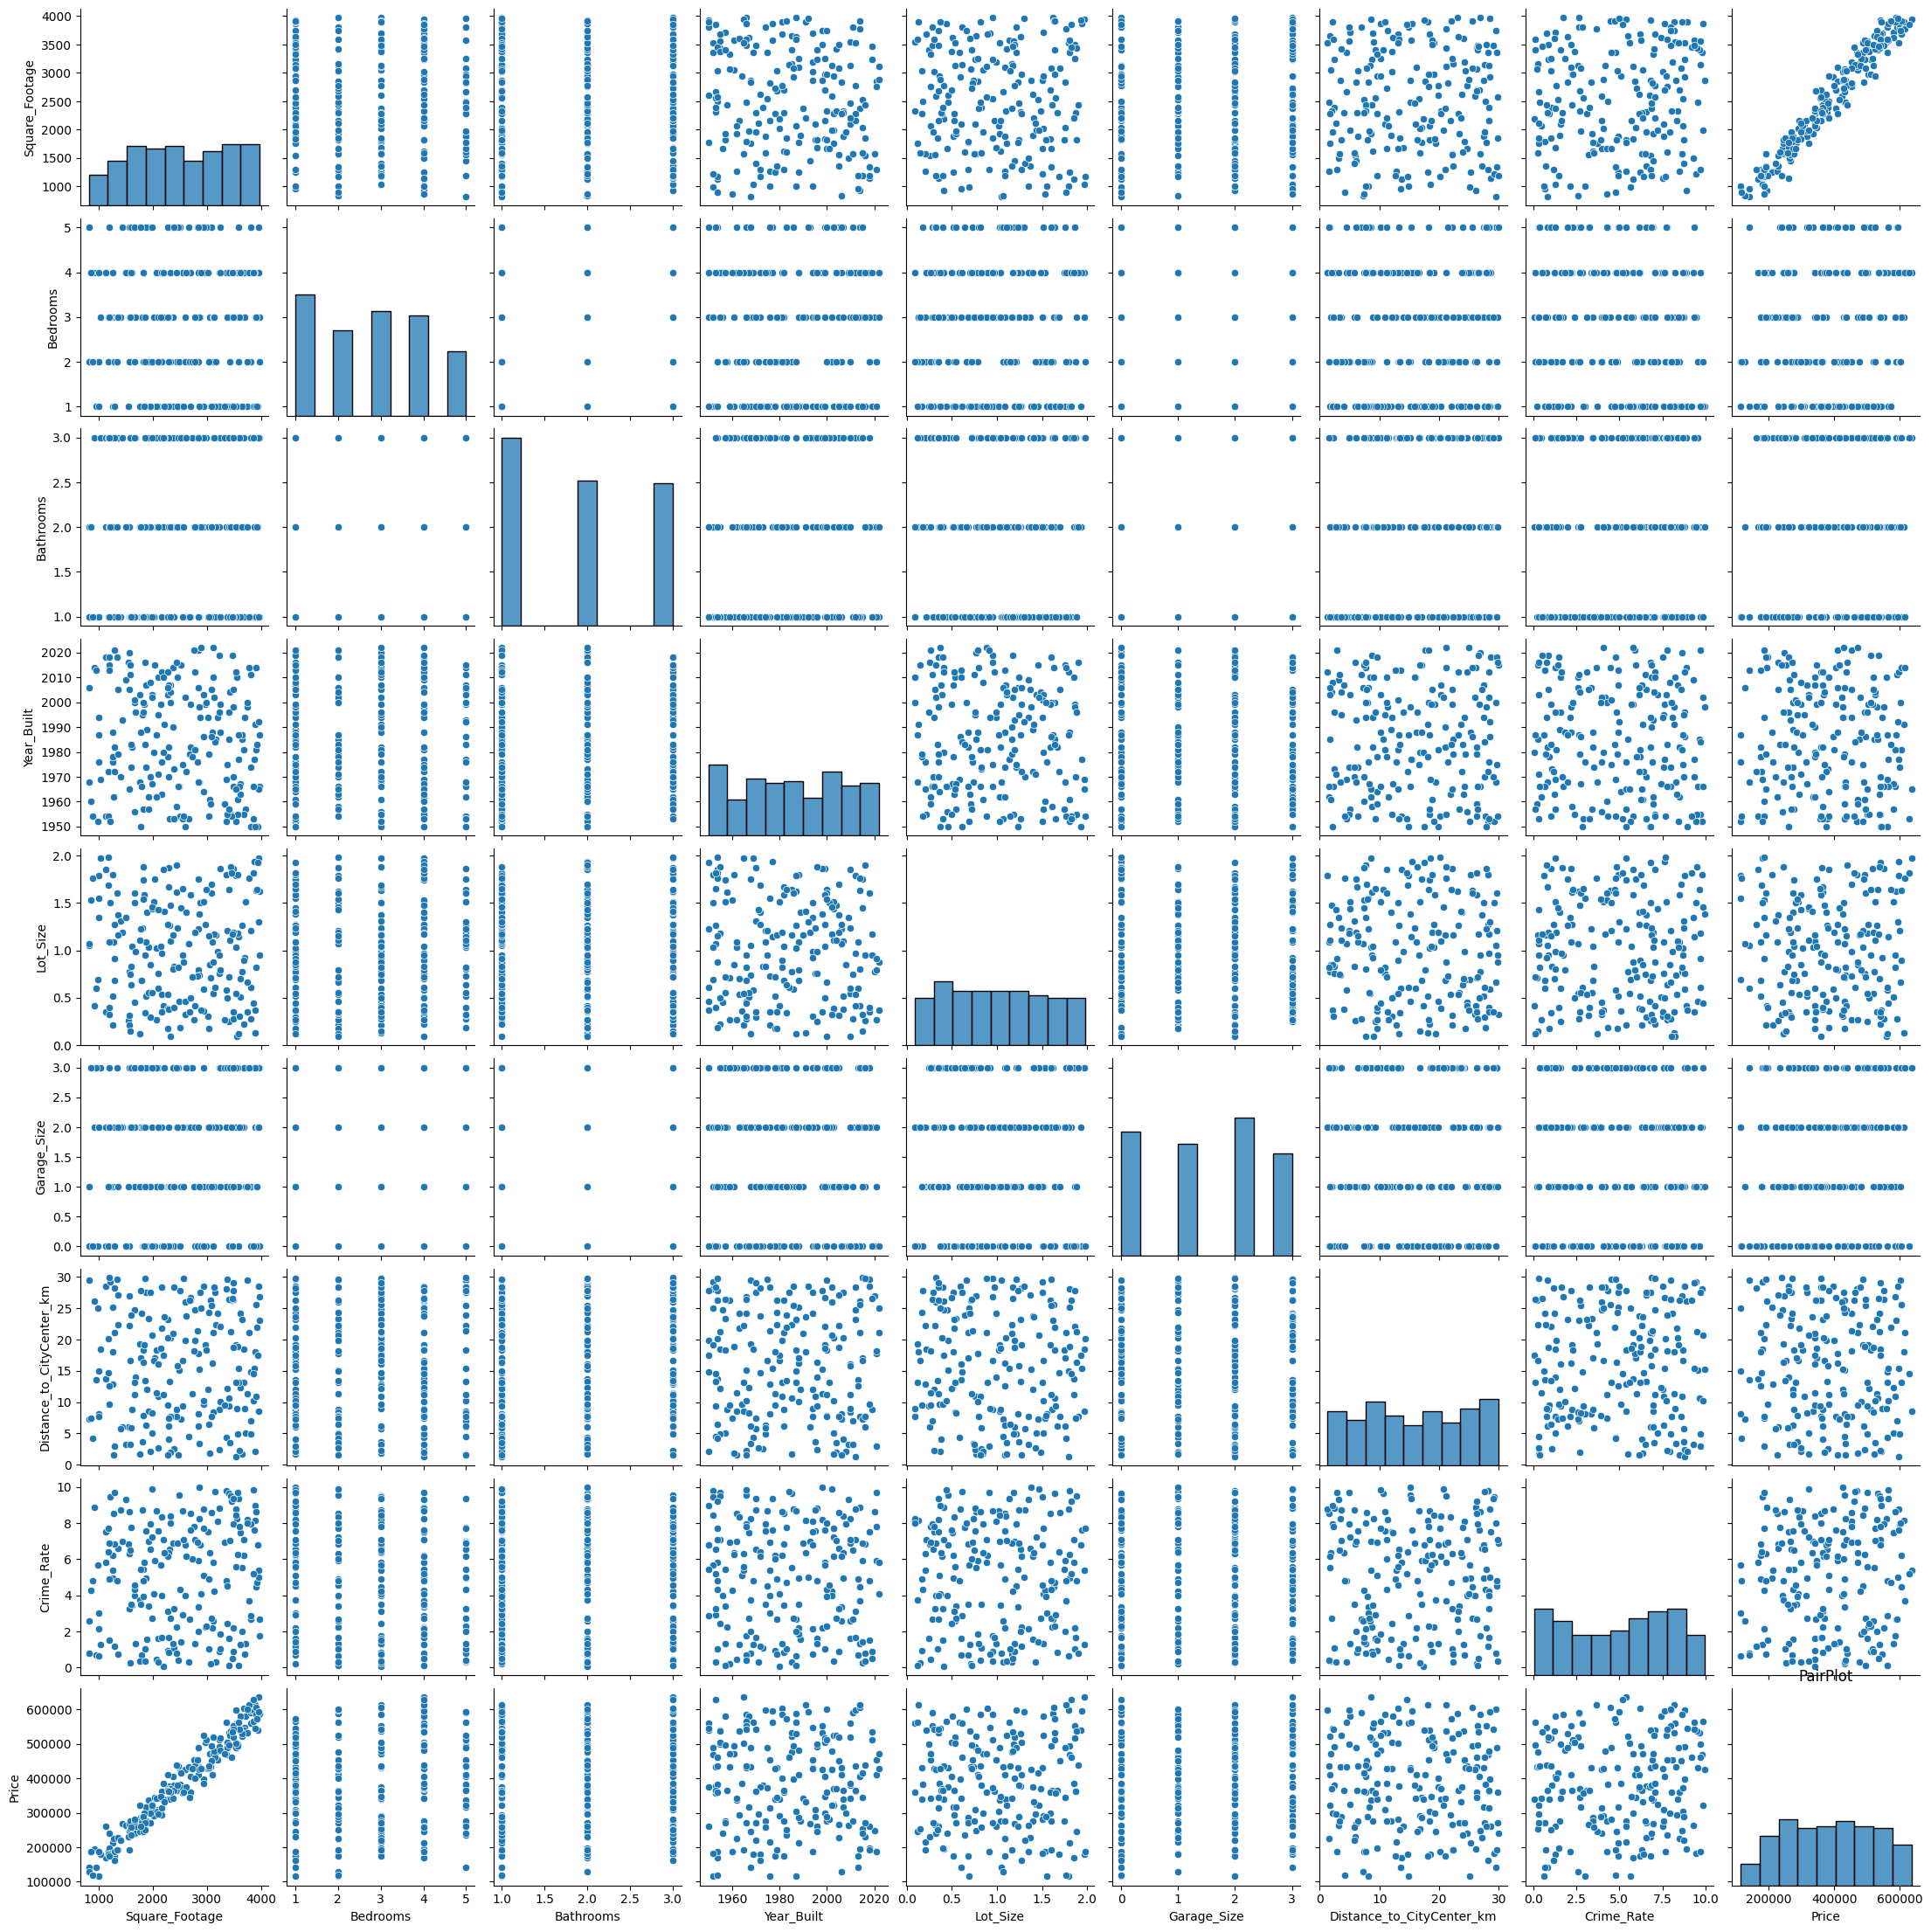

In [7]:
sns.pairplot(data=df)
plt.title("PairPlot")
plt.show()

### Check the co-Relation between the columns through heatmap

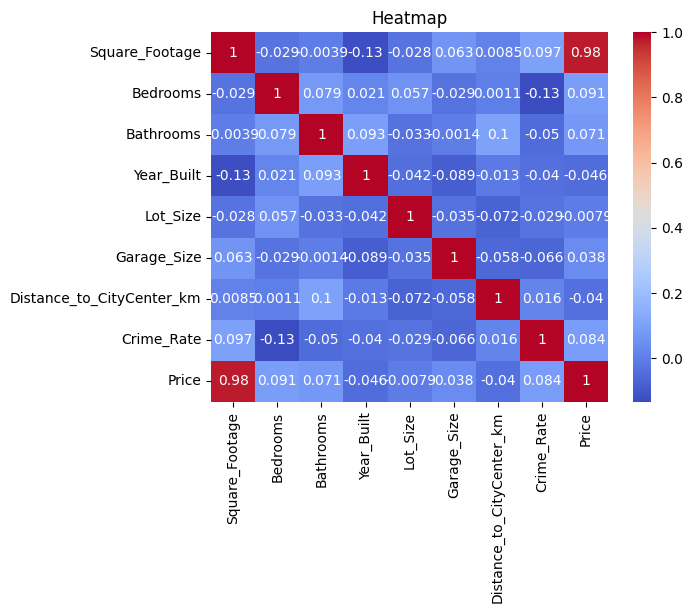

In [8]:
sns.heatmap(df.corr(),annot=True,cmap="coolwarm")
plt.title("Heatmap")
plt.show()

### In the above heatmap, I observed a strong positive correlation between `Square_Footage` and `Price`.  
### I then created a scatterplot to visually confirm this relationship.


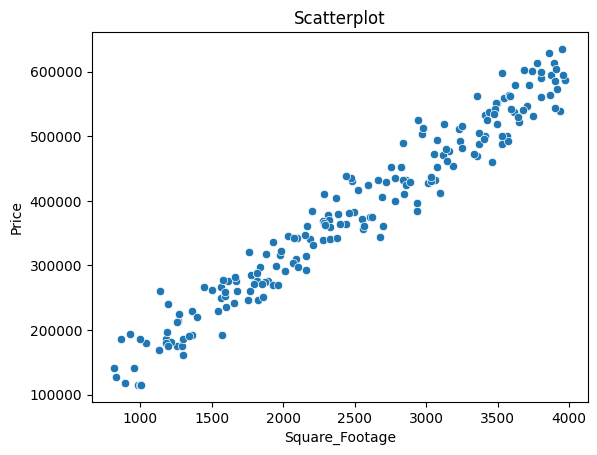

In [9]:
sns.scatterplot(x="Square_Footage",y="Price",data=df)
plt.title("Scatterplot")
plt.show()

### Split the data in x and  y ( Dependent & Independent Variable )

In [10]:
x=df.iloc[:,:--1]
y=df[["Price"]]

### Import Train Test Split from sklearn for spliting the data into training and testing

In [11]:
from sklearn.model_selection import train_test_split

### Split the data into testing and training 

In [12]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=19)

### Import the Machine Learning Model KNNR from Sklearn , use the module Neighbors

In [13]:
from sklearn.neighbors import KNeighborsRegressor

### Apply / Fit the Model 

In [14]:
knr = KNeighborsRegressor()
knr.fit(x_train,y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


### Check the Model Score (accuray) for check the Scanerio of Overfitting (But OverModel is not overfit)

In [15]:
knr.score(x_test,y_test)*100,knr.score(x_train,y_train)*100

(93.14485270530753, 95.99709236420074)

### Predict the value 

In [16]:
df["Prediction"] = knr.predict(x)
df.head()

,Square_Footage,Bedrooms,Bathrooms,Year_Built,Lot_Size,Garage_Size,Distance_to_CityCenter_km,Crime_Rate,Price,Prediction
0,3974,3,1,1966,0.95,0,26.89,1.74,586227.26,591934.696
1,1660,3,1,1956,0.45,1,24.71,3.96,241626.90,261262.838
2,2094,1,3,1995,0.76,3,10.91,7.58,310084.73,319281.982
3,1930,5,2,1962,1.03,0,8.52,6.96,336868.20,290246.088
4,1895,1,1,1989,1.40,1,12.01,1.54,275222.67,295020.932


### Import Metrics from sklearn to check overall performace of the model 

In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

### Check the Performance 

In [18]:
y_pred = knr.predict(x_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)


print(f"📉 MAE: {mae:.2f}")
print(f"📉 MSE: {mse:.2f}")
print(f"📉 RMSE: {rmse:.2f}")
print(f"🎯 R² Score: {r2 * 100:.2f}")


📉 MAE: 29929.54
📉 MSE: 1356688180.08
📉 RMSE: 36833.25
🎯 R² Score: 93.14


### Check the Model Performance Through the Visualization 

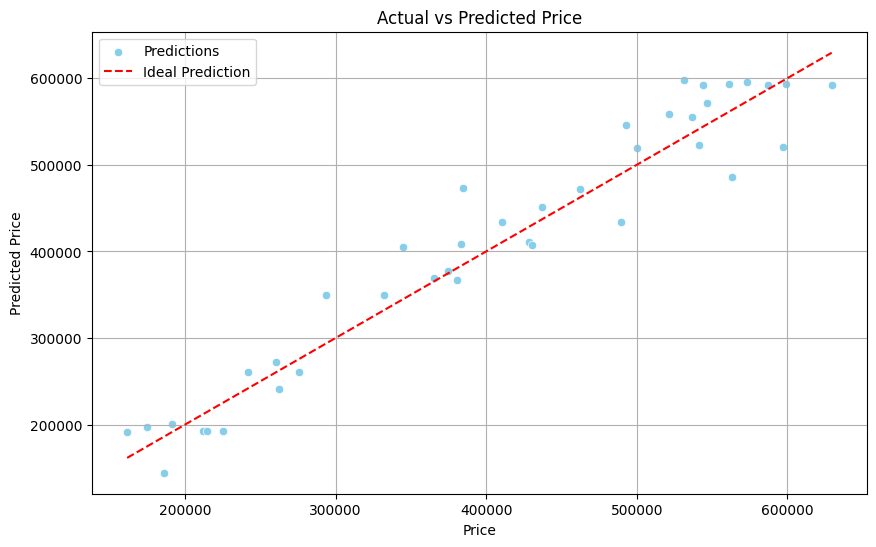

In [19]:
# Make sure y_test is 1D (in case it's a DataFrame)
y_test_flat = y_test.values.ravel()
y_pred_flat = y_pred.ravel()
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test_flat, y=y_pred_flat, color='skyblue', label='Predictions')
plt.plot([y_test_flat.min(), y_test_flat.max()], [y_test_flat.min(), y_test_flat.max()], color='red', linestyle='--', label='Ideal Prediction')
plt.xlabel("Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price")
plt.legend()
plt.grid(True)
plt.show()
